# Fibonacci Sequence with ASTx

# Introduction

The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, usually starting with 0 and 1. The sequence typically looks like this: 0, 1, 1, 2, 3, 5, 8, 13, 21, and so on. It is a common example used to illustrate concepts in programming, including recursion and iterative loops.

In this section, we'll demonstrate how to implement a Fibonacci sequence generator using ASTx. We'll focus on creating an AST for a function that computes Fibonacci numbers using an iterative approach.

## Steps to Implement Fibonacci with ASTx

1. **Define the Function Prototype**: This includes the function name and parameters.
2. **Declare Variables**: Variables needed for the iterative computation.
3. **Create the Loop**: Implement the loop to compute the Fibonacci sequence.
4. **Return the Result**: Return the computed Fibonacci number.

## Implementation

Below is the Python code to create an AST for a Fibonacci function using ASTx. Note that the ASTx library and its components need to be defined as per your setup.

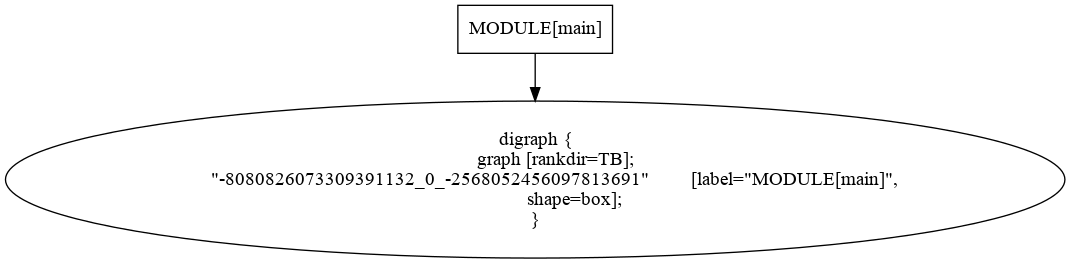

In [1]:
import astx

# Initialize the ASTx module
module = astx.Module()

# Define the Fibonacci function prototype
fib_proto = astx.FunctionPrototype(
    name="fib", 
    args=astx.Arguments(astx.Argument("n", astx.Int32)), 
    return_type=astx.Int32
)

# Create the function body block
fib_block = astx.Block()

# Declare the variables
decl_a = astx.VariableDeclaration(name="a", type_=astx.Int32, value=astx.LiteralInt32(0))
decl_b = astx.VariableDeclaration(name="b", type_=astx.Int32, value=astx.LiteralInt32(1))
decl_i = astx.VariableDeclaration(name="i", type_=astx.Int32, value=astx.LiteralInt32(2))

# Initialize the block with declarations
fib_block.append(decl_a)
fib_block.append(decl_b)
fib_block.append(decl_i)

# Create the loop condition
cond = astx.BinaryOp(
    op_code="<", 
    lhs=astx.Variable(name="i"), 
    rhs=astx.Variable(name="n")
)

# Define the loop body
loop_block = astx.Block()
assign_sum = astx.VariableAssignment(
    name="sum", 
    value=astx.BinaryOp(
        op_code="+", 
        lhs=astx.Variable(name="a"), 
        rhs=astx.Variable(name="b")
    )
)
assign_a = astx.VariableAssignment(name="a", value=astx.Variable(name="b"))
assign_b = astx.VariableAssignment(name="b", value=astx.Variable(name="sum"))
inc_i = astx.VariableAssignment(
    name="i", 
    value=astx.BinaryOp(
        op_code="+", 
        lhs=astx.Variable(name="i"), 
        rhs=astx.LiteralInt32(1)
    )
)

# Add assignments to the loop body
loop_block.append(assign_sum)
loop_block.append(assign_a)
loop_block.append(assign_b)
loop_block.append(inc_i)

# Create the loop statement
loop = astx.While(condition=cond, body=loop_block)
fib_block.append(loop)

# Add return statement
return_stmt = astx.FunctionReturn(astx.Variable(name="b"))
fib_block.append(return_stmt)

# Define the function with its body
fib_fn = astx.Function(prototype=fib_proto, body=fib_block)

# Append the Fibonacci function to the module block
module.block.append(fib_fn)

# Display the module's structure
module

## Explanation

1. **Module Initialization**: We start by initializing the ASTx module.
2. **Function Prototype**: We define the prototype of the Fibonacci function, which takes an integer `n` and returns an integer.
3. **Variable Declarations**: We declare the necessary variables for the computation: `a`, `b`, and `i`.
4. **Loop Construction**: We create a while loop that iterates until `i` is less than `n`. Inside the loop, we update the variables `a`, `b`, and `i` to compute the Fibonacci sequence.
5. **Return Statement**: We add a return statement to return the computed Fibonacci number (`b`).
6. **Appending to the Module**: Finally, we append the function definition to the module and print the module's structure to visualize the AST.

## Conclusion

By following these steps, you can implement the Fibonacci sequence generator using ASTx. This example demonstrates how to use ASTx to create an AST for a simple function, showcasing the flexibility and power of the library. You can extend this example with additional features or optimizations as needed.